<a href="https://colab.research.google.com/github/Jdvilan/Carrera/blob/main/Examen_numerico_segundo_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 19**

Considere la ecuación de calor,

$$\mathcal{U}_t=c^2\mathcal{U}_{xx},\hspace{0.5cm} 0<x<1,\hspace{0.5cm} t>0$$
$$\mathcal{U}(0,t)=60,\hspace{0.5cm}∀t>0$$
$$\mathcal{U}(1,t)=20,\hspace{0.5cm}∀t>0$$
$$\mathcal{U}(x,0)=0,\hspace{0.5cm} 0\leq x\leq 1$$

Utilice el método de Crank-Nicolson

## **Solución analítica**

Suponemos una solución de la forma,

$$\mathcal{U}(x,t)=\mathcal{v}(x,t)+Ψ(x)$$

Es decir, separamos el problema en dos partes, una solución estacionaria (independiente del tiempo) y una solución transitoria (que decae con el tiempo).

Rescribimos el problema original

$$\mathcal{V}_t(x,t)=c^2\mathcal{V}_{xx}(x,t)+c^2Ψ_{xx}(x)$$

### *Solución estacionaria*

$$c^2Ψ_{xx}(x)=0$$

Integramos dos veces

$$Ψ(x)=Ax+B$$

Rescribimos las condiciones de frontera

$$\mathcal{U}(0,t)=\mathcal{V}(0,t)+Ψ(0)=60⇒Ψ(0)=60$$
$$\mathcal{U}(1,t)=\mathcal{V}(1,t)+Ψ(1)=200⇒Ψ(1)=20$$

Sustituyendo

$$Ψ(0)=A(0)+B=60⇒B=60$$
$$Ψ(1)=A(1)+60=20⇒A=-40$$

Así, la solución estacionaria

$$Ψ(x)=-40x+60$$

### *Solución transitoria*

$$\mathcal{V}_t=c^2\mathcal{V}_{xx},\hspace{0.5cm} 0<x<1,\hspace{0.5cm} t>0$$
$$\mathcal{V}(0,t)=0,\hspace{0.5cm}∀t>0$$
$$\mathcal{V}(1,t)=0,\hspace{0.5cm}∀t>0$$

Rescribimos la condición inicial,
$$\mathcal{V}(x,0)=\mathcal{U}(x,0)-Ψ(x)⇒\mathcal{V}(x,0)=-Ψ(x)$$

Así,
$$\mathcal{V}(x,0)=40x-60,\hspace{0.5cm} 0\leq x\leq 1$$

Resolvemos por separación de variables,
$$\frac{N'(t)}{c^2N(t)}=\frac{M''(x)}{M(x)}=λ$$

1) Solución a la ecuacion de segundo orden

$$M''(x)-λM(x)=0$$

Resolvemos por casos,

a) Para $λ=0$, se obtiene la solución $\mathcal{V}(x,t)=0$ pero esto no cumple la condición inicial.

b) Para $λ>0$, se obtiene la solución $\mathcal{V}(x,t)=0$ pero esto no cumple la condición inicial.

c) Para $λ<0⇒λ=-ω^2<0$, sustituimos

$$M''(x)+ω^2M(x)=0$$

Resolviendo la ecuación caracteristica llegamos a la solución

$$M(x)=A\cos(ωx)+B\sin(ωx)$$

Sustituyendo las condiciones de frontera

$$M(0)=A\cos(0)+B\sin(0)=0⇒A=0$$
$$M(1)=B\sin(ω)=0⇒\sin(ω)=0⇒ω=nπ,\hspace{0.5cm}n∈ℤ^+$$

Entonces la solución queda de la siguiente forma,

$$M_n(x)=A_n\sin\left(n\pi x\right)$$

2) Solución a la ecuación de primer orden

$$N'(t)=λc^2N(t)$$

Esta es una ecuación separable, entonces obtenemos una solución de la forma
$$N(t)=Be^{c^2λt}$$

Pero sabemos que $λ=-ω^2=-n^2\pi^2$, así
$$N_n(t)=B_ne^{-n^2\pi^2c^2t}$$

Luego la solución que satisface las condiciones de frontera es,
$$\mathcal{V}_n(t)=C_n\sin\left(n\pi x\right)e^{-n^2\pi^2c^2t}$$

Sabemos que, si se tiene un conjunto de soluciones para una ED homogenea, entonces cualquier combinación lineal también es solución. Entonces,

$$\mathcal{V}(x,t)=\sum_{n=1}^{∞}C_n\sin\left(n\pi x\right)e^{-n^2\pi^2c^2t}$$

Sustituyendo la condición inicial,
$$\mathcal{V}(x,0)=\sum_{n=1}^{∞}C_n\sin\left(n\pi x\right)=40x-60$$

Esto es una serie de Fourier de senos, resolviendo
$$C_n=\frac{40}{n\pi}\left[(-1)^n-3\right]$$

Finalmente, la solución transitoria,
$$\mathcal{V}(x,t)=\sum_{n=1}^{∞}\frac{40}{n\pi}[(-1)^n-3]\sin\left(n\pi x\right)e^{-n^2\pi^2c^2t}$$

Así, la solución a la ecuación de calor,

$$\mathcal{U}(x,t)=-40x+60+\frac{40}{\pi}\sum_{n=1}^{∞}\frac{(-1)^n-3}{n}\sin\left(n\pi x\right)e^{-n^2\pi^2c^2t}$$

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [59]:
def calcular_y(x, t, c, N_terminos):
    # Términos lineales (vector columna para broadcasting)
    y_linear = -40 * x + 60

    # Inicializar suma total con dimensiones (len(x), len(t))
    suma_total = np.zeros((len(x), len(t)))

    for n in range(1, N_terminos + 1):
        coeficiente = ((-1)**n - 3) / n
        seno = np.sin(n * np.pi * x).reshape(-1, 1)  # Convertir a columna
        exponencial = np.exp(-(n**2 * np.pi**2 * c**2 * t)).reshape(1, -1)  # Convertir a fila

        suma_total += coeficiente * seno * exponencial

    suma_total *= 40 / np.pi
    y = y_linear.reshape(-1, 1) + suma_total  # Broadcasting a todas las t

    return y

# Parámetros ajustables
c = 1
N_terminos = 1000

# Configuración común para x
x = np.linspace(0, 1, 1000)

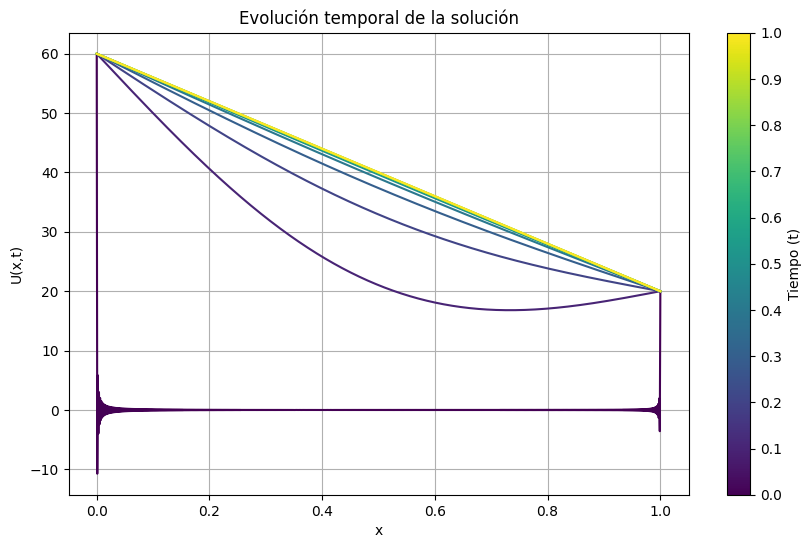

In [60]:
# ======================================
# 1. Gráfico de evolución temporal (2D)
# ======================================
t_values = np.linspace(0, 1, 11)
y_evolution = calcular_y(x, t_values, c, N_terminos)

fig, ax = plt.subplots(figsize=(10, 6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=0, vmax=1)

# Crear todas las líneas primero
for i, t in enumerate(t_values):
    ax.plot(x, y_evolution[:, i],
            color=cmap(norm(t)),
            label=f't = {t:.1f}')

# Crear el mappable para la colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Necesario para evitar warnings

# Añadir colorbar usando el eje existente
cbar = fig.colorbar(sm, ax=ax, label='Tiempo (t)', ticks=t_values)
cbar.ax.set_yticklabels([f"{t:.1f}" for t in t_values])  # Formatear etiquetas

ax.set_title('Evolución temporal de la solución')
ax.set_xlabel('x')
ax.set_ylabel('U(x,t)')
ax.grid(True)
plt.show()

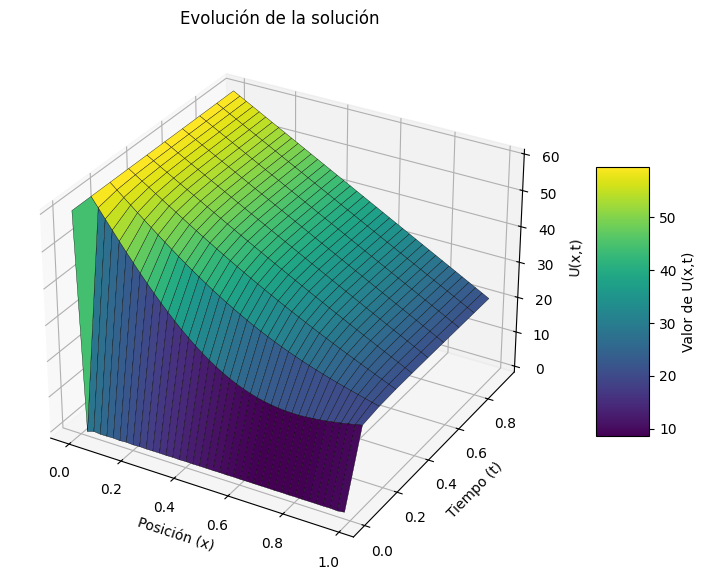

In [61]:
# =============================================
# 2. Gráfico 3D
# =============================================
# Usamos menos puntos para mejor rendimiento
x_3d = np.linspace(0, 1, 200)
t_3d = np.linspace(0, 1, 50)
X, T = np.meshgrid(x_3d, t_3d, indexing='ij')  # Mallas 2D
Y_3d = calcular_y(x_3d, t_3d, c, N_terminos)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Usamos solo cada 5to punto en x y t para mejor visualización
surface = ax.plot_surface(X[::5, ::5], T[::5, ::5], Y_3d[::5, ::5],
                         cmap='viridis',
                         edgecolor='k',
                         linewidth=0.25,
                         antialiased=True)

ax.set_xlabel('Posición (x)')
ax.set_ylabel('Tiempo (t)')
ax.set_zlabel('U(x,t)')
ax.set_title('Evolución de la solución')
fig.colorbar(surface, shrink=0.5, aspect=5, label='Valor de U(x,t)')

plt.show()

La ecuación del calor modela la difusión de temperatura en un medio unidimensional, como una varilla metálica, bajo condiciones específicas de frontera e iniciales. En este ejemplo, se analiza el caso de una varilla de longitud unitaria ($0≤x≤1$) cuyos extremos se mantienen fijos a temperaturas constantes de 60°C ($x=0$) y 20°C ($x=1$), mientras que inicialmente toda la varilla se encuentra a 0°C. La solución analítica de este problema predice un estado estacionario lineal ($-40x+60$) y una componente transitoria que decae exponencialmente. Para complementar este análisis teórico, se implementó el método numérico de Crank-Nicolson, un esquema implícito de segundo orden en tiempo y espacio, que permite resolver la ecuación del calor de manera eficiente y estable.

## **Solución numérica**

1) Discretización del dominio,

Dividimos el intervalo en N subintervalos con puntos en la malla $x_i=ih$ donde $i=0,1,...,N$ y $h=\frac{1}{N}$.

2) Condiciones iniciales y de frontera,

$$U_{i,0}=0,\hspace{0.5cm}\text{para}\hspace{0.5cm}i=1,...,N-1$$
$$U_{0,j}=60,\hspace{0.5cm}∀j$$
$$U_{N,j}=20, \hspace{0.5cm}∀j$$

3) Discretización de la EDP

$$U_{i,j+1}(1+2r)-r(U_{i+1,j+1}+U_{i-1,j+1})=U_{i,j}(1-2r)+r(U_{i+1,j}+U_{i-1,j})$$

con $r=\frac{c^2k}{2h^2}$

Finalmente, obtenemos la siguiente representacion matricial,

$$
U_{i,j+1}\begin{bmatrix}
1+2r & -r & 0 & 0 & . & . & .\\
-r & 1+2r & -r & 0 & . & . & .\\
. & . & . & . & . & . & .\\
. & . & . & . & . & . & .\\
. & . & . & . & . & . & .\\
0 & 0 & . & . & . & -r & 1+2r
\end{bmatrix}=U_{i,j}\begin{bmatrix}
1-2r & r & 0 & 0 & . & . & .\\
r & 1-2r & r & 0 & . & . & .\\
. & . & . & . & . & . & .\\
. & . & . & . & . & . & .\\
. & . & . & . & . & . & .\\
0 & 0 & . & . & . & r & 1-2r
\end{bmatrix}+\begin{bmatrix}
r(U_{i-1,j}+U_{i-1,j+1})\\
0\\
0\\
r(U_{i+1,j}+U_{i+1,j+1})
\end{bmatrix}
$$

El método de Crank-Nicolson discretiza la ecuación de calor promediando las aproximaciones de diferencias finitas en el tiempo. Esto genera un sistema lineal tridiagonal en cada paso temporal, resuelto mediante el algoritmo de Thomas. La estabilidad incondicional del método permite utilizar pasos temporales relativamente grandes sin comprometer la precisión, mientras que la discretización espacial controla la resolución del gradiente térmico. Para este estudio, se eligió $Δx=0.05$ (20 nodos) y $Δt=0.001$, garantizando un equilibrio entre eficiencia y exactitud.

In [62]:
def crank_nicolson(L, T, c, m, n, f_init, g0, gL):
    """
    Resuelve la ecuación de calor U_t = c^2 U_xx usando Crank-Nicolson
    en una barra [0,L] hasta tiempo T
    con condiciones de frontera g0(t), gL(t) y condición inicial f_init(x).

    Devuelve:
    - x: vector de posiciones
    - t: vector de tiempos
    - u_final: vector columna de la temperatura en t = T
    - u_full: evolución completa para graficar
    """
    dx = L / m
    dt = T / n
    s = (c / dx)**2 * (dt / 2)

    x = np.linspace(0, L, m+1)
    t = np.linspace(0, T, n+1)

    # Matriz de evolución
    u = np.zeros(m+1)
    u_full = np.zeros((m+1, n+1))

    # Condición inicial
    u[:] = f_init(x)
    u_full[:,0] = u.copy()

    # Condiciones de frontera
    frontera_izq = g0(t)
    frontera_der = gL(t)
    u[0] = frontera_izq[0]
    u[-1] = frontera_der[0]

    # Armar matrices del sistema
    A = np.zeros((m-1, m-1))
    B = np.zeros((m-1, m-1))

    # Matriz A para el paso de tiempo (implícita)
    for i in range(m-1):
        A[i,i] = 1 + s
        if i > 0:
            A[i,i-1] = -s/2
        if i < m-2:
            A[i,i+1] = -s/2

    # Matriz B para el tiempo anterior (explícita)
    for i in range(m-1):
        B[i,i] = 1 - s
        if i > 0:
            B[i,i-1] = s/2
        if i < m-2:
            B[i,i+1] = s/2

    # Método de avance temporal
    for ti in range(n):
        b = B @ u[1:-1]  # Solo nodos interiores
        # Corrección por condiciones de frontera
        b[0] += (s/2)*(u[0] + frontera_izq[ti+1])
        b[-1] += (s/2)*(u[-1] + frontera_der[ti+1])

        # Resolver sistema
        u_interior = np.linalg.solve(A, b)

        # Actualizar
        u[1:-1] = u_interior
        u[0] = frontera_izq[ti+1]
        u[-1] = frontera_der[ti+1]

        # Guardar en matriz completa
        u_full[:,ti+1] = u.copy()

    return x, t, u, u_full

In [63]:
# Ejemplo de uso:

# Parámetros
L = 1.0      # Longitud de la barra
T = 1        # Tiempo total
c = 1      # Coeficiente de difusión
m = 20        # Número de divisiones espaciales
n = 1000      # Número de divisiones temporales

# Condiciones iniciales y de frontera
def f_init(x):
    return np.zeros_like(x)

def g0(t):
    return 60*np.ones_like(t)

def gL(t):
    return 20*np.ones_like(t)

# Ejecutar método
x, t, u_final, u_full = crank_nicolson(L, T, c, m, n, f_init, g0, gL)

In [64]:
# Mostrar vector columna solución final
np.set_printoptions(precision=5, suppress=True)
print(u_final.reshape(-1,1))  # Matriz columna

[[60.     ]
 [57.94224]
 [55.8859 ]
 [53.83237]
 [51.78296]
 [49.7389 ]
 [47.70127]
 [45.671  ]
 [43.64883]
 [41.6353 ]
 [39.63075]
 [37.6353 ]
 [35.64883]
 [33.671  ]
 [31.70127]
 [29.7389 ]
 [27.78296]
 [25.83237]
 [23.8859 ]
 [21.94224]
 [20.     ]]


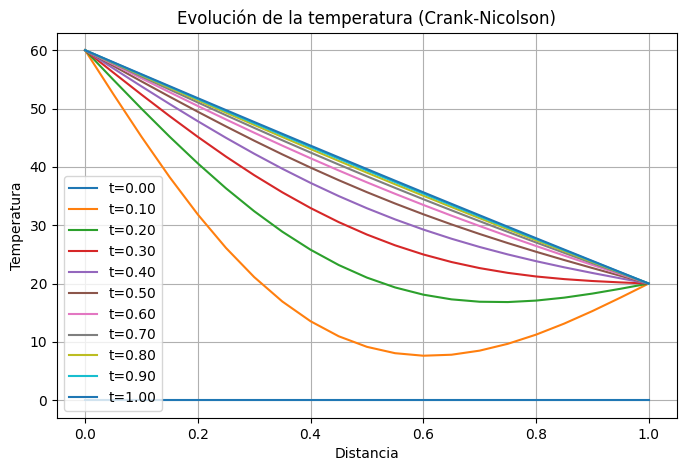

In [65]:
# Graficar evolución
fig = plt.figure(figsize=(8,5))
for i in range(0, n+1, n//10):
    plt.plot(x, u_full[:,i], label=f't={t[i]:.2f}')
plt.title('Evolución de la temperatura (Crank-Nicolson)')
plt.xlabel('Distancia')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()

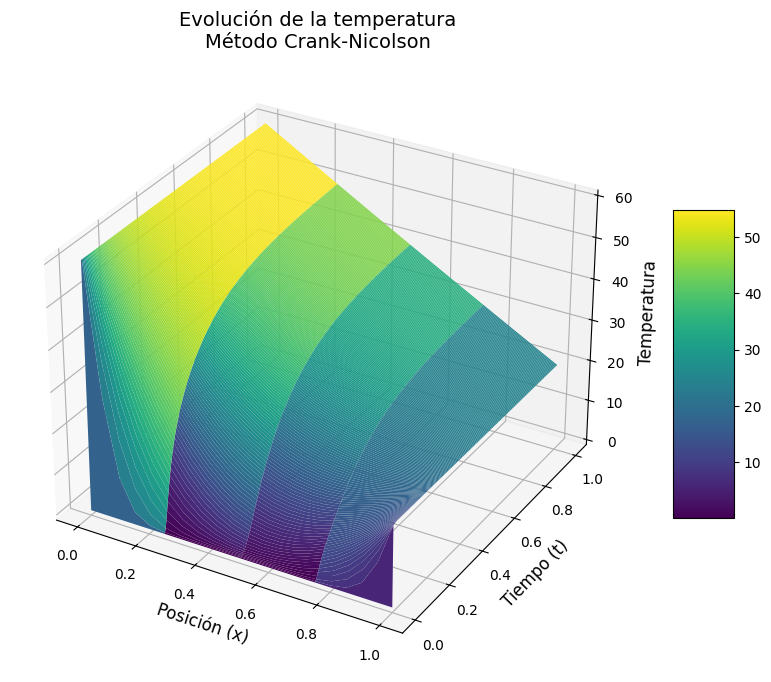

In [66]:
from mpl_toolkits.mplot3d import Axes3D

# Crear gráfico 3D
X, T_mesh = np.meshgrid(x, t)  # Malla para coordenadas 3D
Z = u_full.T                   # Transponer para dimensiones correctas

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar superficie
surf = ax.plot_surface(X, T_mesh, Z, cmap='viridis', rstride=5, cstride=5)

# Configuraciones del gráfico
ax.set_xlabel('Posición (x)', fontsize=12)
ax.set_ylabel('Tiempo (t)', fontsize=12)
ax.set_zlabel('Temperatura', fontsize=12)
ax.set_title('Evolución de la temperatura\nMétodo Crank-Nicolson', fontsize=14)

# Barra de colores
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Las gráficas obtenidas muestran la distribución de temperatura en la varilla en intervalos de tiempo desde $t=0.00$ hasta $t=1.00$. En $t=0.00$, la temperatura es uniformemente 0°C, como lo establece la condición inicial. A medida que avanza el tiempo, se observa un flujo de calor desde el extremo caliente ($x=0$) hacia el frío ($x=1$), generando un gradiente térmico que evoluciona hacia el perfil lineal predicho analíticamente.

*   **Comportamiento Inicial ($t<0.30$):** El calor penetra rápidamente cerca de $x=0$, elevando la temperatura en esta región. En $t=0.10$, la temperatura en $x=0.2$ alcanza aproximadamente 20°C, mientras que en $x=0.4$ sigue cercana 0°C. Este desfase refleja la naturaleza difusiva del proceso: el calor tarda en propagarse a través del material.

*   **Transición hacia el Estado Estacionario ($0.30≤t≤0.70$):** A medida que
$t$ aumenta, el gradiente térmico se suaviza. En $t=0.50$, la temperatura en $x=0.6$ supera los 10°C, evidenciando que el calor ha alcanzado la mitad de la varilla. Las variaciones bruscas en la temperatura que se observan al inicio, producto del cambio repentino en las condiciones iniciales, se van suavizando con el tiempo. Este comportamiento coincide con la rápida disminución de las componentes que representan cambios espaciales rápidos, tal como lo describe la solución teórica del problema.

*   **Aproximación al Equilibrio ($t≥0.80$):** Para $t=1.00$, el perfil de temperatura se acerca notablemente al estado estacionario $-40x+60$. Por ejemplo, en $x=0.4$, la temperatura numérica ronda 44°C, mientras que el valor analítico es $-40(0.4)+60=44$. Esta coincidencia valida la precisión del método.

# **Problema 20**

Considere la ecuaión de calor,

$$\mathcal{U}_t=c^2\mathcal{U}_{xx},\hspace{0.5cm} 0<x<1,\hspace{0.5cm} t>0$$
$$\mathcal{U}(0,t)=0,\hspace{0.5cm}∀t>0$$
$$\mathcal{U}(1,t)=40,\hspace{0.5cm}∀t>0$$
$$\mathcal{U}(x,0)=400x(1-x),\hspace{0.5cm} 0\leq x\leq 1$$

Utilice el método de Crank-Nicolson

## **Solución analítica**

Suponemos una solución de la forma,

$$\mathcal{U}(x,t)=\mathcal{v}(x,t)+Ψ(x)$$

Es decir, separamos el problema en dos partes, una solución estacionaria (independiente del tiempo) y una solución transitoria (que decae con el tiempo).

Rescribimos el problema original

$$\mathcal{V}_t(x,t)=c^2\mathcal{V}_{xx}(x,t)+c^2Ψ_{xx}(x)$$

### *Solución estacionaria*

$$c^2Ψ_{xx}(x)=0$$

Integramos dos veces

$$Ψ(x)=Ax+B$$

Rescribimos las condiciones de frontera

$$\mathcal{U}(0,t)=\mathcal{V}(0,t)+Ψ(0)=0⇒Ψ(0)=0$$
$$\mathcal{U}(1,t)=\mathcal{V}(1,t)+Ψ(1)=40⇒Ψ(1)=40$$

Sustituyendo

$$Ψ(0)=A(0)+B=0⇒B=0$$
$$Ψ(1)=A(1)=40⇒A=40$$

Así, la solución estacionaria

$$Ψ(x)=40x$$

### *Solución transitoria*

$$\mathcal{V}_t=c^2\mathcal{V}_{xx},\hspace{0.5cm} 0<x<1,\hspace{0.5cm} t>0$$
$$\mathcal{V}(0,t)=0,\hspace{0.5cm}∀t>0$$
$$\mathcal{V}(1,t)=0,\hspace{0.5cm}∀t>0$$

Rescribimos la condición inicial,
$$\mathcal{V}(x,0)=\mathcal{U}(x,0)-Ψ(x)⇒\mathcal{V}(x,0)=-400(1-x)-Ψ(x)$$

Así,
$$\mathcal{V}(x,0)=-400x(1-x)-40x=400x^2-440x,\hspace{0.5cm} 0\leq x\leq 1$$

Resolvemos por separación de variables,
$$\frac{N'(t)}{c^2N(t)}=\frac{M''(x)}{M(x)}=λ$$

1) Solución a la ecuacion de segundo orden

$$M''(x)-λM(x)=0$$

Resolvemos por casos,

a) Para $λ=0$, se obtiene la solución $\mathcal{V}(x,t)=0$ pero esto no cumple la condición inicial.

b) Para $λ>0$, se obtiene la solución $\mathcal{V}(x,t)=0$ pero esto no cumple la condición inicial.

c) Para $λ<0⇒λ=-ω^2<0$, sustituimos

$$M''(x)+ω^2M(x)=0$$

Resolviendo la ecuación caracteristica llegamos a la solución

$$M(x)=A\cos(ωx)+B\sin(ωx)$$

Sustituyendo las condiciones de frontera

$$M(0)=A\cos(0)+B\sin(0)=0⇒A=0$$
$$M(1)=B\sin(ω)=0⇒\sin(ω)=0⇒ω=nπ,\hspace{0.5cm}n∈ℤ^+$$

Entonces la solución queda de la siguiente forma,

$$M_n(x)=A_n\sin\left(n\pi x\right)$$

2) Solución a la ecuación de primer orden

$$N'(t)=λc^2N(t)$$

Esta es una ecuación separable, entonces obtenemos una solución de la forma
$$N(t)=Be^{c^2λt}$$

Pero sabemos que $λ=-ω^2=-n^2\pi^2$, así
$$N_n(t)=B_ne^{-n^2\pi^2c^2t}$$

Luego la solución que satisface las condiciones de frontera es,
$$\mathcal{V}_n(t)=C_n\sin\left(n\pi x\right)e^{-n^2\pi^2c^2t}$$

Sabemos que, si se tiene un conjunto de soluciones para una ED homogenea, entonces cualquier combinación lineal también es solución. Entonces,

$$\mathcal{V}(x,t)=\sum_{n=1}^{∞}C_n\sin\left(n\pi x\right)e^{-n^2\pi^2c^2t}$$

Sustituyendo la condición inicial,
$$\mathcal{V}(x,0)=\sum_{n=1}^{∞}C_n\sin\left(n\pi x\right)=400x^2-440x$$

Esto es una serie de Fourier de senos, resolviendo
$$C_n=\frac{80}{n\pi}\left[(-1)^n+\frac{20(-1)^n-20}{n^2π^2}\right]$$

Finalmente, la solución transitoria,
$$\mathcal{V}(x,t)=\sum_{n=1}^{∞}\frac{80}{n\pi}\left[(-1)^n+\frac{20(-1)^n-20}{n^2π^2}\right]\sin\left(n\pi x\right)e^{-n^2\pi^2c^2t}$$

Así, la solución a la ecuación de calor,

$$\mathcal{U}(x,t)=40x+\frac{80}{\pi}\sum_{n=1}^{∞}\frac{(-1)^n+\frac{20(-1)^n-20}{n^2π^2}}{n}\sin\left(n\pi x\right)e^{-n^2\pi^2c^2t}$$

In [67]:
def calcular_y(x, t, c, N_terminos):
    # Términos lineales (vector columna para broadcasting)
    y_linear = 40 * x

    # Inicializar suma total con dimensiones (len(x), len(t))
    suma_total = np.zeros((len(x), len(t)))

    for n in range(1, N_terminos + 1):
        coeficiente = -((-1)**n + ((20 * (-1)**n)-20) / (n**2 * np.pi**2)) / n
        seno = np.sin(n * np.pi * x).reshape(-1, 1)  # Convertir a columna
        exponencial = np.exp(-(n**2 * np.pi**2 * c**2 * t)).reshape(1, -1)  # Convertir a fila

        suma_total += coeficiente * seno * exponencial

    suma_total *= 80 / np.pi
    y = y_linear.reshape(-1, 1) + suma_total  # Broadcasting a todas las t

    return y

# Parámetros ajustables
c = 1
N_terminos = 1000

# Configuración común para x
x = np.linspace(0, 1, 1000)

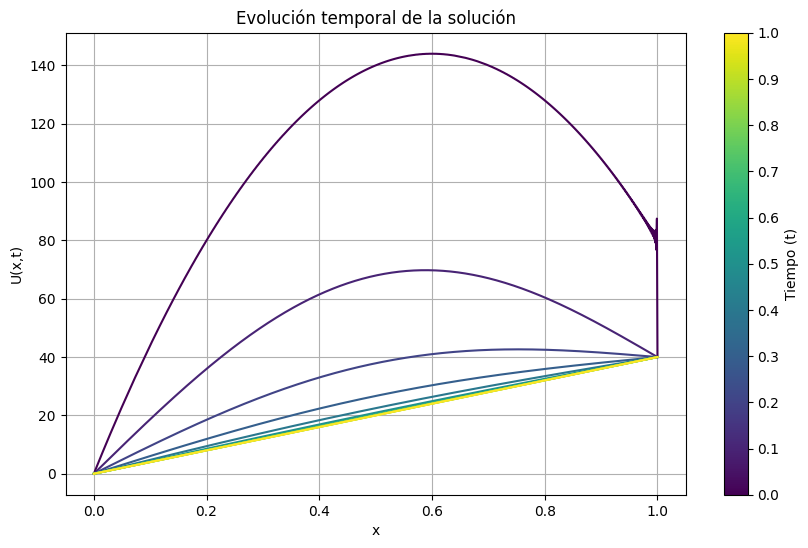

In [68]:
# ======================================
# 1. Gráfico de evolución temporal (2D)
# ======================================
t_values = np.linspace(0, 1, 11)
y_evolution = calcular_y(x, t_values, c, N_terminos)

fig, ax = plt.subplots(figsize=(10, 6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=0, vmax=1)

# Crear todas las líneas primero
for i, t in enumerate(t_values):
    ax.plot(x, y_evolution[:, i],
            color=cmap(norm(t)),
            label=f't = {t:.1f}')

# Crear el mappable para la colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Necesario para evitar warnings

# Añadir colorbar usando el eje existente
cbar = fig.colorbar(sm, ax=ax, label='Tiempo (t)', ticks=t_values)
cbar.ax.set_yticklabels([f"{t:.1f}" for t in t_values])  # Formatear etiquetas

ax.set_title('Evolución temporal de la solución')
ax.set_xlabel('x')
ax.set_ylabel('U(x,t)')
ax.grid(True)
plt.show()

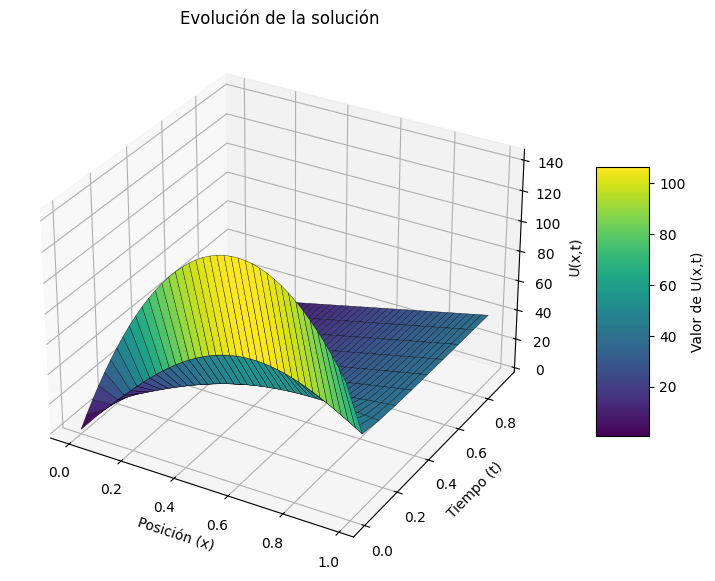

In [69]:
# =============================================
# 2. Gráfico 3D
# =============================================
# Usamos menos puntos para mejor rendimiento
x_3d = np.linspace(0, 1, 200)
t_3d = np.linspace(0, 1, 50)
X, T = np.meshgrid(x_3d, t_3d, indexing='ij')  # Mallas 2D
Y_3d = calcular_y(x_3d, t_3d, c, N_terminos)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Usamos solo cada 5to punto en x y t para mejor visualización
surface = ax.plot_surface(X[::5, ::5], T[::5, ::5], Y_3d[::5, ::5],
                         cmap='viridis',
                         edgecolor='k',
                         linewidth=0.25,
                         antialiased=True)

ax.set_xlabel('Posición (x)')
ax.set_ylabel('Tiempo (t)')
ax.set_zlabel('U(x,t)')
ax.set_title('Evolución de la solución')
fig.colorbar(surface, shrink=0.5, aspect=5, label='Valor de U(x,t)')

plt.show()

La solución teórica del problema se basa en una fórmula que combina infinitas "ondas" matemáticas. Cada una de estas ondas representa un tipo de variación en la temperatura: algunas capturan cambios bruscos (como el salto en el extremo), y otras, variaciones suaves. Con el tiempo, las ondas asociadas a cambios abruptos pierden fuerza rápidamente (como si se desvanecieran), mientras que las que describen patrones estables permanecen por más tiempo. Así, la solución analítica no solo predice el resultado final, sino que también explican cómo y por qué el sistema evoluciona de una forma y no de otra.

## **Solución numérica**

1) Discretización del dominio,

Dividimos el intervalo en N subintervalos con puntos en la malla $x_i=ih$ donde $i=0,1,...,N$ y $h=\frac{1}{N}$.

2) Condiciones iniciales y de frontera,

$$U_{i,0}=400x_i(1-x_i),\hspace{0.5cm}\text{para}\hspace{0.5cm}i=1,...,N-1$$
$$U_{0,j}=0,\hspace{0.5cm}∀j$$
$$U_{N,j}=40, \hspace{0.5cm}∀j$$

3) Discretización de la EDP

$$U_{i,j+1}(1+2r)-r(U_{i+1,j+1}+U_{i-1,j+1})=U_{i,j}(1-2r)+r(U_{i+1,j}+U_{i-1,j})$$

con $r=\frac{c^2k}{2h^2}$

Finalmente, obtenemos la siguiente representacion matricial,

$$
U_{i,j+1}\begin{bmatrix}
1+2r & -r & 0 & 0 & . & . & .\\
-r & 1+2r & -r & 0 & . & . & .\\
. & . & . & . & . & . & .\\
. & . & . & . & . & . & .\\
. & . & . & . & . & . & .\\
0 & 0 & . & . & . & -r & 1+2r
\end{bmatrix}=U_{i,j}\begin{bmatrix}
1-2r & r & 0 & 0 & . & . & .\\
r & 1-2r & r & 0 & . & . & .\\
. & . & . & . & . & . & .\\
. & . & . & . & . & . & .\\
. & . & . & . & . & . & .\\
0 & 0 & . & . & . & r & 1-2r
\end{bmatrix}+\begin{bmatrix}
r(U_{i-1,j}+U_{i-1,j+1})\\
0\\
0\\
r(U_{i+1,j}+U_{i+1,j+1})
\end{bmatrix}
$$

In [70]:
# Ejemplo de uso:

# Parámetros
L = 1.0      # Longitud de la barra
T = 1        # Tiempo total
c = 1      # Coeficiente de difusión
m = 20        # Número de divisiones espaciales
n = 100      # Número de divisiones temporales

# Condiciones iniciales y de frontera
def f_init(x):
    return 400 * x * (1 - x)

def g0(t):
    return np.zeros_like(x)

def gL(t):
    return 40*np.ones_like(t)

# Ejecutar método
x, t, u_final, u_full = crank_nicolson(L, T, c, m, n, f_init, g0, gL)

In [71]:
# Mostrar vector columna solución final
np.set_printoptions(precision=5, suppress=True)
print(u_final.reshape(-1,1))  # Matriz columna

[[ 0.     ]
 [ 2.08832]
 [ 4.17447]
 [ 6.25633]
 [ 8.33187]
 [10.39924]
 [12.45678]
 [14.50307]
 [16.53698]
 [18.55766]
 [20.56461]
 [22.55766]
 [24.53698]
 [26.50307]
 [28.45678]
 [30.39924]
 [32.33187]
 [34.25633]
 [36.17447]
 [38.08832]
 [40.     ]]


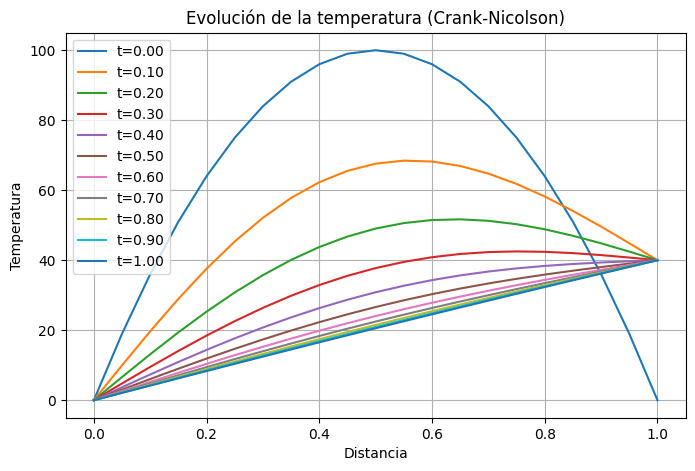

In [72]:
# Graficar evolución
fig = plt.figure(figsize=(8,5))
for i in range(0, n+1, n//10):
    plt.plot(x, u_full[:,i], label=f't={t[i]:.2f}')
plt.title('Evolución de la temperatura (Crank-Nicolson)')
plt.xlabel('Distancia')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()


*   **Momento inicial ($t=0.00$):** La varilla está más caliente en el centro ($100°C$) y fría en los extremos ($0°C$ y $40°C$). Sin embargo, hay una contradicción: el extremo derecho salta abruptamente de $0°C$ (según la condición inicial) a $40°C$ (condición de frontera), creando un "choque térmico" localizado.

*   **Primeros instantes ($t=0.10-0.30$):** El calor comienza a escaparse desde el centro hacia ambos extremos. En el extremo derecho ($x=1$), la temperatura se estabiliza rápidamente en 40°C, mientras que en zonas cercanas (como $x=0.8$) sube de 0°C a 40°C. El pico central se aplana a $t=0.30$.

*   **Etapa intermedia ($t=0.40-0.70$):** La curva parabólica inicial se transforma en una pendiente suave. El calor fluye predominantemente hacia el extremo derecho, acercando la temperatura en $x=0.6$ a $30°C$ para $t=0.50$. Las irregularidades cerca de $x=1$ (producto del salto inicial) desaparecen, gracias a la capacidad del material para distribuir el calor uniformemente.

*   **Hacia el equilibrio ($t=0.80-1.00$):** En $t=1.00$, el perfil es casi una línea recta entre $0°C$ y $40°C$, confirmando que el sistema alcanza el equilibrio térmico.

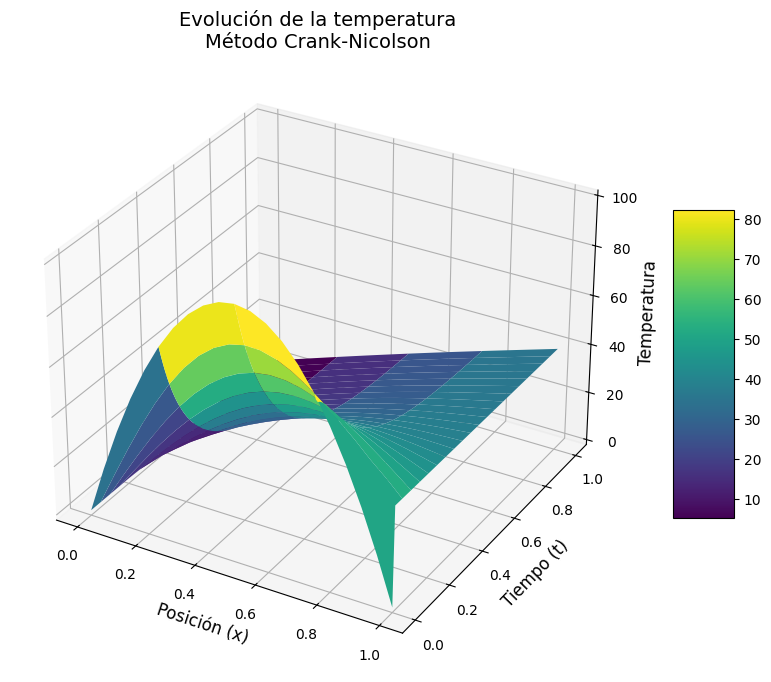

In [73]:
from mpl_toolkits.mplot3d import Axes3D

# Crear gráfico 3D
X, T_mesh = np.meshgrid(x, t)  # Malla para coordenadas 3D
Z = u_full.T                   # Transponer para dimensiones correctas

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar superficie
surf = ax.plot_surface(X, T_mesh, Z, cmap='viridis', rstride=5, cstride=5)

# Configuraciones del gráfico
ax.set_xlabel('Posición (x)', fontsize=12)
ax.set_ylabel('Tiempo (t)', fontsize=12)
ax.set_zlabel('Temperatura', fontsize=12)
ax.set_title('Evolución de la temperatura\nMétodo Crank-Nicolson', fontsize=14)

# Barra de colores
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

El calor viaja de las zonas más calientes a las más frías, pero no lo hace de golpe. La velocidad con la que se distribuye depende de la capacidad del material para conducir energía. En este caso, el material elegido tiene una conductividad térmica media (representada por $c^2=1$), lo que significa que el equilibrio térmico no es inmediato, pero tampoco extremadamente lento. Si el material fuera mejor conductor (por ejemplo, un metal puro), el calor se repartiría mucho más rápido.

Al inicio, hay cambios bruscos en la temperatura, como el salto repentino en el extremo derecho de la varilla. Sin embargo, con el tiempo, estos "picos" se van disipando. Esto ocurre porque el material actúa como un filtro natural, suavizando las diferencias extremas y favoreciendo distribuciones de temperatura más uniformes.
